### Final Project Submission

1) Student name: Andrew Reusche
2) Student pace: self paced
3) Schedules project review date time: Febuary 10 4:30pm
4) Instructor name: Mark Barbor

# Automation Integration Via Machine Learning Dermason Bean Classification

Author: Andrew Reusche

## Business problem: 

A food manufacturer who buys bulk quantities of beans wants to see if classification via machine learning can be utilized to help automate some of their production systems and improve their manufacturing efficiency. 

### Test case area of concern:

The manufacturer imports (7) different types of beans that all go through the same clean and wash cycle together. During this cycle, the beans are all mixed together and need to be separated into their respective 7 categories as effectively as possible. The current method of separation is to have the mixture of beans go down a single conveyor where teams of workers pick out the respective different kinds of beans by hand, and deliver the separated categories over to their associated next process locations. Doing this separation by hand is extremely tedious, time-consuming, and prone to error.

The hope is that automating part of this process would increase efficiency. 

For an automation trial run, focused on filtering the Dermanson bean out of the other 6 kinds of mixed beans, we will see if a supervised machine-learning model can be used to correctly classify what is and is not a Dermason bean. Once separated, the Demason bean will be packaged up, and shipped out to retail stores across the county. 

### Metric of Success:

In this case, the manufacturer has stated that it is most important to try to minimize the false positive rate of classification, shown by the Specificity score, or minimize the number of beans incorrectly categorized as a Dermason bean. 

Here, the false negative rate, shown by the Recal score or beans incorrectly categorized as not a Dermason bean, is the more acceptable error metric because all beans not clearly identified as one of the 7 categories will go to the batch processing area where the mixture will be sold to an animal food manufacturer.

### Method of Extracting Data From Beans and Filtering Beans into Categories:

After the mixed wash, the beans will go down a conveyor belt that is equipped with a series of high-resolution cameras programmed to take pictures of all the individual beans from different angles. Once these pictures are taken, a computer will analyze the photos with a computer vision program to extract 12 different dimensional metrics such as the bean's area, perimeter, and roundness. This extracted multivariate data will then be put into a Supervised Machine Learning Algorithm in an attempt to classify each bean into its correct category.

### Utilized Machine Learning Technologies:

We will be utilizing Decision Trees and Logistic Regression models paired with Stratified-K-Fold cross-validation techniques and grid searches to optimize and tailor these machine-learning models to the manufacturer's requested metric of success. Specifically One Verus All classification will be used to maximize Specificity and Precision, while not letting Recal drop too low.

## The Data:

### Data Source and Data Use:

Source: "Dry Bean." UCI Machine Learning Repository, 2020, https://doi.org/10.24432/C50S4B.

To simulate this multivariate data extraction I used the "Dry Bean" dataset from the UCI Machine Learning Repository (cited above).    

This Dataset contains over 13,000 data instances of beans that have had multivariate data extracted from pictures taken of them via a computer vision system. These data instances are made up of 7 different types of registered dry beans, with each instance having 16 features that describe different dimensional and shape-form metrics the bean exhibits.  

Here the "Class" variable, which dictates which of the 7 types of beans each instance is, will be manipulated to create a new variable called "Dermason" that states if the data instance is or is not a Dermason bean. This new "Dermason" variable will be the target-dependent variable and will enable us to use One Versus All classification.  

The other 16 variables, listed below, make up the independent variables we will use to train the machine-learning models to classify each data instance as either "Yes" a Dermason bean, or "No" not a Dermason bean. Each of these 16 variables aligns perfectly with potential dimensional metrics that could be extracted should the beans be going down a conveyor belt with cameras and a computer vision program programmed to extract dimensional information from the individual bean pictures they process. 

tor4 (SF4)
    

### Data limitations

There are some limitations to this dataset that I would like to note:

1) Without seeing the actual pictures that this dataset used to extract each bean's dimensionality and shape factor we have no way of knowing for sure if each stated bean classification is actually true. Instead, we are only operating under the unverified assumption that these classifications are true.

2) The same can be said for calculations of the bean dimensionality and shape factor variables. Without being able to see the code behind how the computer vision and calculations work, we are only operating under the unverified assumption that these dimensional measurements and shape factors are true.

3) Many factors and attributes can be used to describe the properties of a dried bean. Off the bat, size, weight, and color are three common metrics that I can think of. This dataset only takes into account metrics that I would put under the size umbrella, leaving other potentially very useful information on the table.

Given that information, we can only state that this model will be classifying the type of bean based on unverified dimensional metrics that we assume to be true. 

## Bring in the data and preview it

In [1]:
#hide warning messages that may pop up obscuring notebook view
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import relevant libraries to help us view and manipulate the data
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
#load in the data from an Excel file and save in a pandas dataset
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
#preview the data
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
#check for data types and see if any information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#check out a decription of the dataset and look for patterns
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Feature Engineering

Check to see what proportion of the data each of the 7 types of beans takes up. From this take the most frequent bean type and manipulate the data so that it can be used for One Versus All classification of that highest proportion bean type.

In [6]:
#check to see the proportion of the data that each bean takes up
bean_df['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

Dermason is the most frequent bean type. Manipulate the data to make that the new target column.

In [7]:
#use a lambda function to create a new column showing if each data instance is or isn't a Dermason bean
bean_df['Dermason']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Dermason
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0


In [8]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason'].value_counts(normalize=True)

Dermason
0    0.739475
1    0.260525
Name: proportion, dtype: float64

## Split the data into train and test subsets for model evaluation and training

In [9]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

## Data Preprocessing

### Data Distribution Normalization

Check out the distribution of the existing training dataset. Its distribution, if skewed, may result in problematic generalization of under-represented classes (like Dermason Bean), model overfitting, or skewed performance metrics of the binary classifier model. 

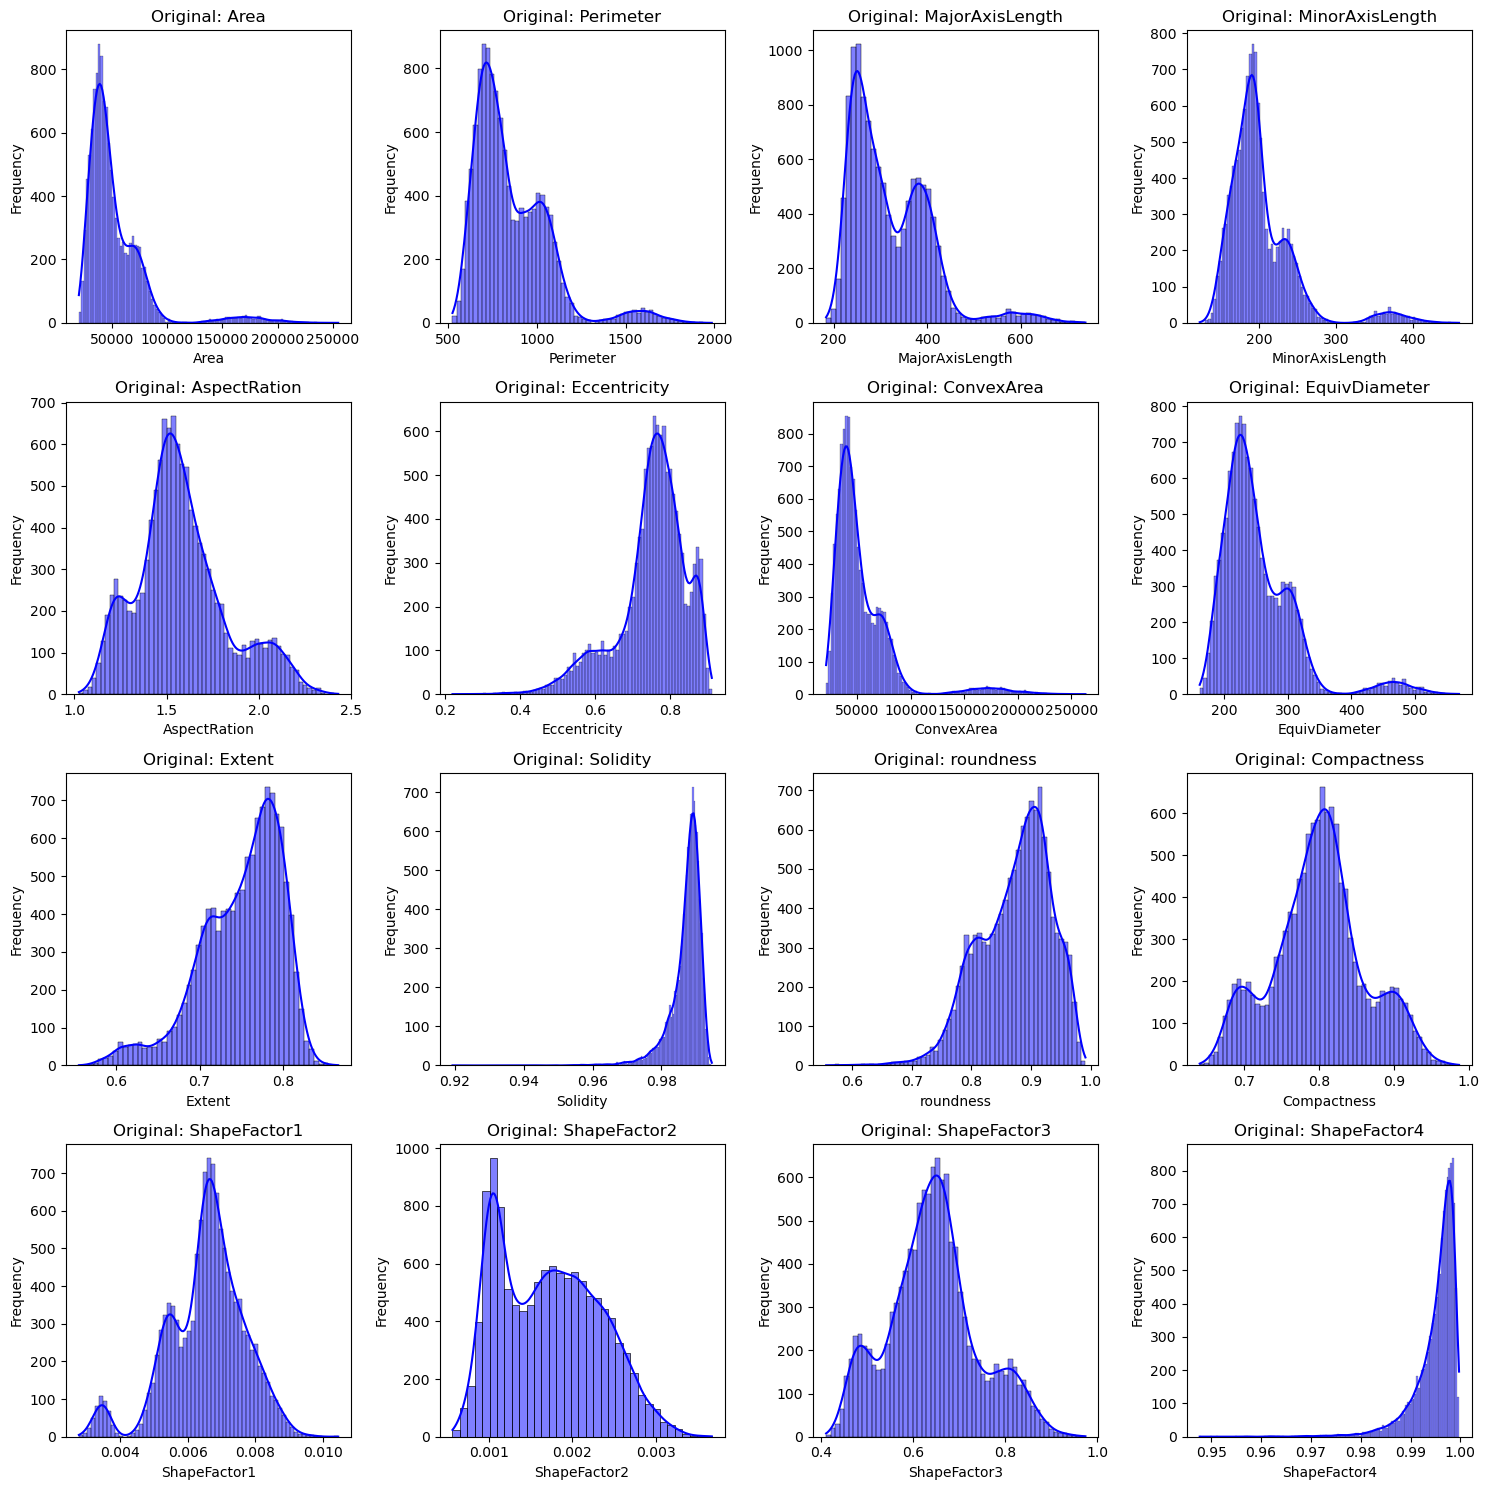

In [10]:
#check out the data distrobutions
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

ax = ax.flatten()

#Plot the data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Nearly all of the columns in the training dataset are skewed. See if running the right skewed data through Log Transformations, and running the left skewed data through a Box-Cox Transformation can normalize their distributions.

In [11]:
#create a function to normalize the distribution of the data
def TransShift(df):
    #columns with right skewed data
    LogT = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
            'EquivDiameter', 'ShapeFactor2']
    #columns with left skewed data
    BoxCoxT = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

    #initialize empty dataframe
    Redist = pd.DataFrame()

    #loop over the columns of the passed in dataframe and normalize them accordingly 
    for col in df.columns:
        if col in LogT:
            Redist[col] = np.log1p(df[col]) #log1p is value += 1
        #shift the values of the inputted columns in order to avoid overflow warning from Box-Cox Transformation
        elif col in BoxCoxT:
            min_val = df[col].min()
            if min_val <= 0:
                shifted_col = df[col] - min_val + 1
            else:
                shifted_col = df[col]
            Redist[col], _ = stats.boxcox(shifted_col)
        else:
            Redist[col] = df[col]

    #returns transformed dataframe
    return Redist


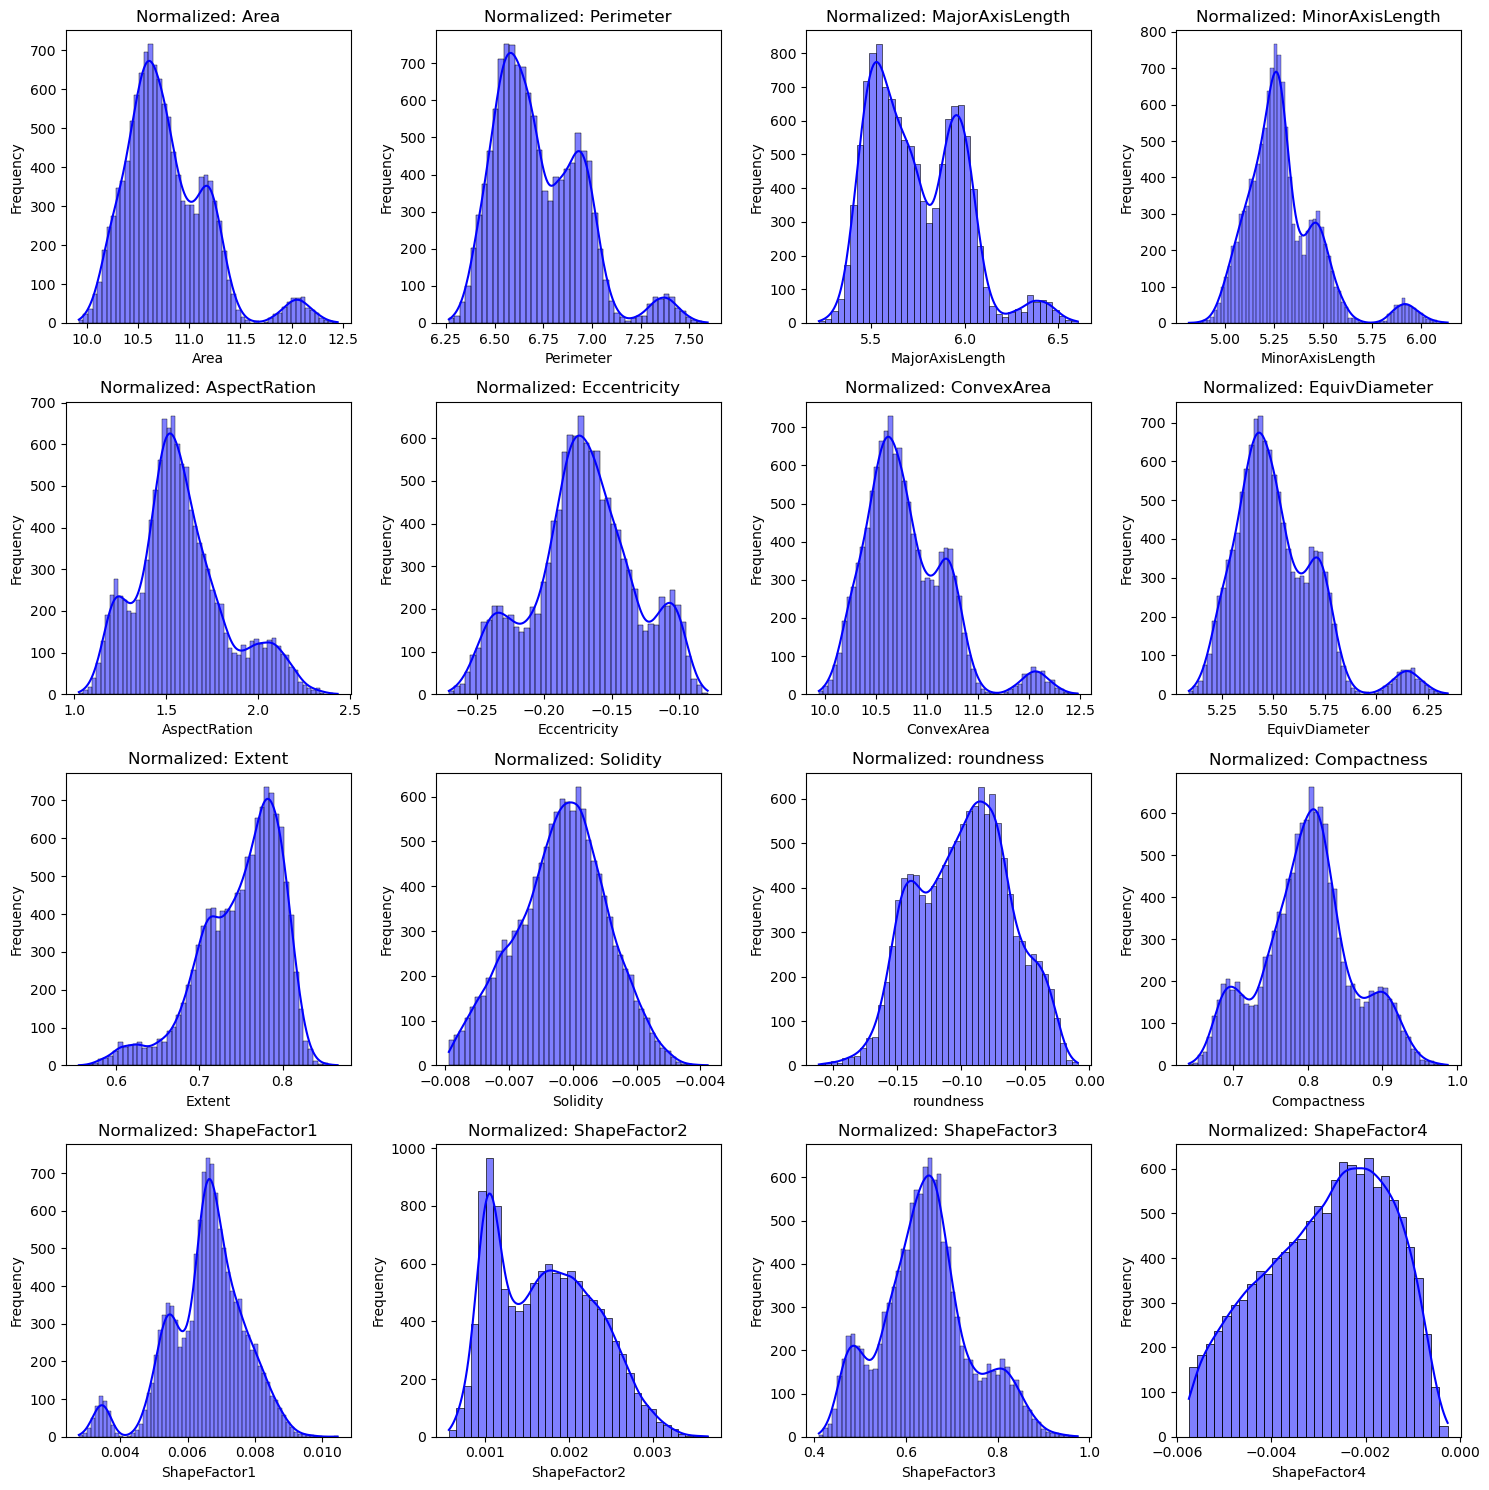

In [12]:
#call the normalization function on the data to transform it
X_train_Norm= TransShift(X_train)

#examine the normalized data
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

ax = ax.flatten()


for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Normalized: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Although not perfect, this technique has greatly improved the distrobutions of the data. 

### Data value scaling

Using a scaler to scale the values of the independent variables can help some models like Logistic Regression treat all values will equal importance. For example Area is currently counted in the 10,000's range, whereas Shape Factor 1 is counted in the .001's range. Due to Area's number being inherently larger, it may receive a higher weight when taking different factors into account. Scaling the data would help place all the variables on equal footing, potentially allowing the model to make more valuable predictions.

### Data SMOTEing and Random Undersampling

Using SMOTEing and Random Undersampling can both help and hurt datasets with unbalanced dependant target variables (like Dermason with ~25% of the datapoints and Not-Dermason with 75% of the datapoints). On the positive side doing these two things can create more synthetic instances of the minority class (Dermason) can cut back the inputted proportion of the majority class (Not-Dermason), bringing the proportion closer to 50%-50%. On the downside, doing both of these things could also create instances of minority class data combinations that are not natural, and potentially eliminate previous training data that was crucial to the model learning.

## Model instantiation, tuning, and evaluation 

Creation of a class that allows us to pass in different classification models, preprocess the data passed into the models, tune the hyperparameters of the models, and view how effective these models are at achieving the manufacturer's requested success metrics. 

This class will use cross-validation to help us understand how the models will react to "unseen" data, and not just overfit on the training data during the tuning stage of the model selection process. In addition to this, since our target class (Dermason) is imbalanced in our dataset (only takes up roughly 25% of the instances), this class will specifically use Stratified K-fold Cross Validation to make sure that each fold the dataset is broken into maintains this similar proportion (~25%), making the folds more representative of the original dataset and easier to compare to each other. 

Data preprocessing option selection will be available through choosing the dataset you pass in (normalized distribution or non), whether you want the data scaled/ what kind of scaler,  and whether you would like the data to be SMOTE'd / Randomly Undersampled to help the training data's class imbalance move closer to 50%-50% from the existing 25%-75%. 

Model hyperparameter tuning options will be available by passing any hyperparameter values the classification model may have into the keyword argument (model_kwargs).

As a representation of how these models are performing in regards to the manufacturer's requested metric of success, the passed in models will output the following:

1) The average Specificity score across the folds for the training and validation datasets.
2) The average Precision score across the folds for the training and validation datasets.
3) The average Recall score across the folds for the training and validation datasets.
4) A confusion matrix for the training and validation sets containing the average TN, FP, FN, TP rates



In [13]:
class ModelWithCV():
    #initialize the instance of the class
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {},\
                 scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    #perform k-fold cross validation to evaluate model's performance
    def cross_validate(self, X=None, y=None, kfolds=10):

        #check if data is dataframe or series
        cv_X = X if X else self.X
        cv_y = y if y else self.y
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        #set up the stratified splits
        cv_splits = StratifiedKFold(n_splits=kfolds)

        #store splits performance metrics
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  
        total_conf_matrix_train = np.zeros((2, 2))  

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')

        #train and evaluate model in each fold
        #split up the data in the fold into train and evaluate
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            #instantiate the model, make sure random_state is set to 24 for reproducibility
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            #scale the data
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            #SMOTE and Randomly undersample the data
            if self.smote_and_rand_und:
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            self.model.fit(X_train, y_train)

            #make train and validation predictions
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            #make training set confusion matrix
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            
            #make training set performance scores
            specificity_train = TN_train / (TN_train + FP_train) 
            specificity_scores_train.append(specificity_train)
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)

            #make validation set confusion matrix
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            #make validation set performance scores
            specificity = TN / (TN + FP)  
            specificity_scores.append(specificity)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        #calculate the average train and val performance scores from the above lists
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    #print the average performance summaries of the train and val set
    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    
    #print the average confusion matrixes of the train and val set
    def plot_avg_conf_matrix(self):
        if self.avg_conf_matrix is not None:
            labels= ['Not Dermason', 'Dermason']
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train, 
                                         display_labels= labels)
            disp.plot(cmap=plt.cm.Blues, values_format='.0f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix,
                                         display_labels= labels)
            disp.plot(cmap=plt.cm.Blues, values_format='.0f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()

### Baseline classification models

#### Run a baseline Logistic Regression model to get the unpreprocessed and untuned performance results

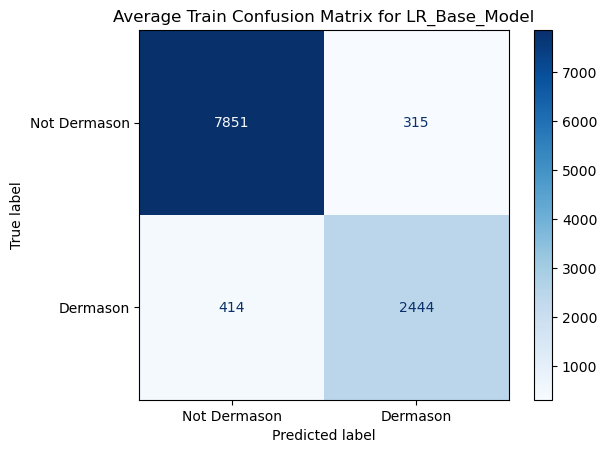

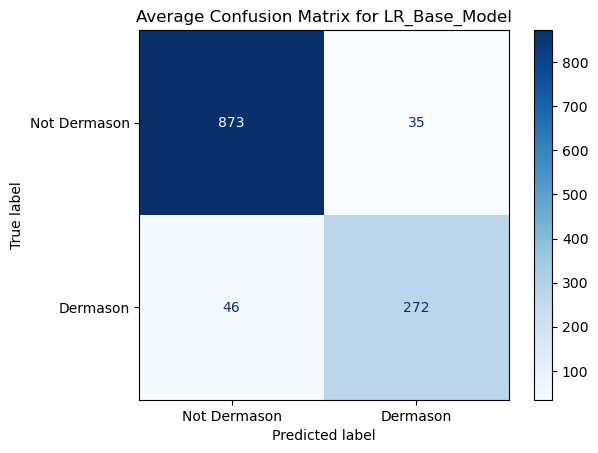

###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


(0.9618657383347337, 0.887693568491631, 0.8561286034561435, {}, False, False)

In [14]:
LR_Baseline_Results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'LR_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

LR_Baseline_Results.plot_avg_conf_matrix()

LR_Baseline_Results.print_cv_summary()

Based off of the baseline model's performance results we can say that the training model does not seem to be overfitting on the data and generalizes well to unseen data. With a 96.187% validation specificity score we can say that the model is already very good at identifying what is not a Dermason bean. The validation precision score of 88.769% tells us that out off all the beans the model predicted to be a Dermason bean roughly 88% of them actually are. These are not a bad scores, although a second filter may be needed on the production line to eliminate the small percentage of non-Dermason beans that were predicted to be Dermason beans. The recal is the lowest of the three metrics, but is still fairly high at 85.613%, and due to this being the manufacturer's least important metric of the three, correctly identifying 85% of the actual Dermason beans is not that bad given all the Dermason beans we failed to identify can still be sold as animal food. 

#### Run a baseline Decision Tree model to get the unpreprocessed and untuned performance results

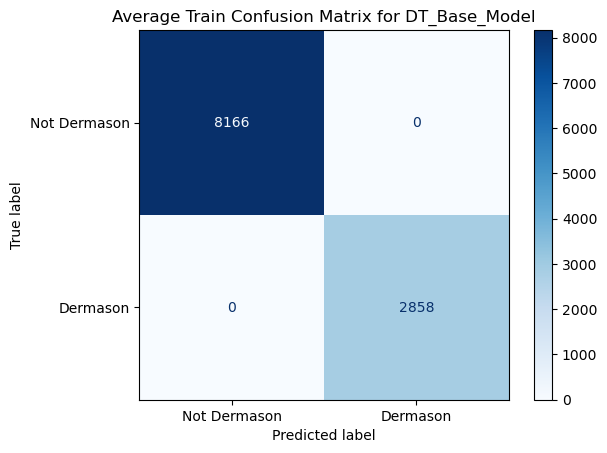

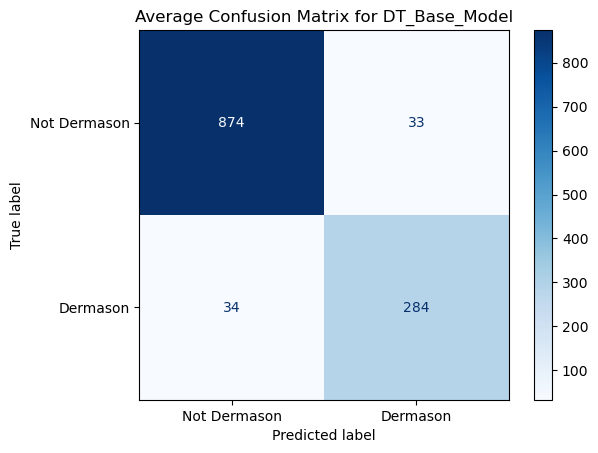

results for dt baseline:
###TRAIN###
CV results for DT_Base_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 1.00000
###VAL###
CV results for DT_Base_Model model:Average specificity: 0.96352
Average precision: 0.89575
Average recall: 0.89389

results for lr baseline:
###TRAIN###
CV results for LR_Base_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_Base_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


(0.9618657383347337, 0.887693568491631, 0.8561286034561435, {}, False, False)

In [15]:
DT_Baseline_Results= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                    model_name= 'DT_Base_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

DT_Baseline_Results.plot_avg_conf_matrix()

#compare the summary to the previous Logistic Regression to see which is better
print('results for dt baseline:')
DT_Baseline_Results.print_cv_summary()
print()
print('results for lr baseline:')
LR_Baseline_Results.print_cv_summary()

Based off of the Decision Tree (DT) baseline model's performance results we can say that the training model is overfitting on the training data and does not perform as well with unseen data as it does with the training dats. However, with a 96.352% validation specificity score we can say that this model performs better than the baseline Logistic Regression (LR) model at identifying what is not a Dermason bean. The validation precision score of 89.575% tells us that out off all the beans the model predicted to be a Dermason bean roughly 89% of them actually are, which is higher than the LR's score as well. These are not a bad scores, although a second filter may still be needed on the production line to eliminate the small percentage of non-Dermason beans that were predicted to be Dermason beans. The recal score is the still lowest of the three metrics, but is still fairly high at 89.389% and is roughly 4% higher than the LR's score. Due to recal still being the manufacturer's least important metric of the three, correctly identifying 89% of the actual Dermason beans is not that bad given all the Dermason beans we failed to identify can still be sold as animal food. 

### Tuned classification models

Now that we have a general idea how well each model will perform when presented with unseen data, let's run grid searches on the models to find out which preprocessing and hyperparameter tuning will result in the most effective versions of these models in reference to the manufacturers requested success metrics.

## Run a grid search for preprocessing and hyperparameter tuning the Logistic Regression model

In [16]:
class ModelWithGridCV():
    #initialize the instance of the class
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {},\
                 scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    #perform k-fold cross validation to evaluate model's performance
    def cross_validate(self, X=None, y=None, kfolds=10):

        #check if data is dataframe or series
        cv_X = X if X else self.X
        cv_y = y if y else self.y
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        #set up the stratified splits
        cv_splits = StratifiedKFold(n_splits=kfolds)

        #store splits performance metrics
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  
        total_conf_matrix_train = np.zeros((2, 2))  

        #if self.scaler:
            #print('Scaling')

        #if self.smote_and_rand_und:
            #print('SMOTEing and Randomly Undersampling')

        #train and evaluate model in each fold
        #split up the data in the fold into train and evaluate
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            #instantiate the model, make sure random_state is set to 24 for reproducibility
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            #scale the data
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            #SMOTE and Randomly undersample the data
            if self.smote_and_rand_und:
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            self.model.fit(X_train, y_train)

            #make train and validation predictions
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            #make training set confusion matrix
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            
            #make training set performance scores
            specificity_train = TN_train / (TN_train + FP_train) 
            specificity_scores_train.append(specificity_train)
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)

            #make validation set confusion matrix
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            #make validation set performance scores
            specificity = TN / (TN + FP)  
            specificity_scores.append(specificity)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        #calculate the average train and val performance scores from the above lists
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    #print the average performance summaries of the train and val set
    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
         
        #print('###TRAIN###')
        #print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        #print('###VAL###')
        #print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    
    #print the average confusion matrixes of the train and val set
    def plot_avg_conf_matrix(self):
        if self.avg_conf_matrix is not None:
            labels= ['Not Dermason', 'Dermason']
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train, 
                                         display_labels= labels)
            disp.plot(cmap=plt.cm.Blues, values_format='.0f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix,
                                         display_labels= labels)
            disp.plot(cmap=plt.cm.Blues, values_format='.0f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()

I would like to note that this search scale has been narrowed down to parameters previously discovered to be effective, while still demonstrating the effectiveness and utility of the code. This has been done because previous wider searches have proven to be too computationally expensive for my current computer to handle, and cause the notebook to significantly slow down and-or crash. The original grid search parameters are noted above the current ones for reference. One potential way to mitigate this problem could be to split up the grid search and tune for one parameter at a time. 

In [17]:
#store iteration results
lr_metric_tracker= []
lr_data_and_scaler= []

#iterable options

#trained either using as is distributed data "X_train" or data transformed with
#box-cox and Log "X_Train_Norm"
data_sets= [X_train, X_train_Norm]

#[0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
C= [1, 10, 10000, 100000]

#as shown below
int_fit= [True, False]

#['liblinear', 'saga', 'lbfgs']
solvers = ['liblinear', 'saga']

#as shown below
smote= [True, False]

#[False (no scaler), StandardScaler(), MinMaxScaler()]
scaler= [False, MinMaxScaler()]


#nested for loops to iterate through all the above options
for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for fit in int_fit:
        for sm in smote:
            for sc in scaler:        
                for c in C:
                    for solvera in solvers:
                        model_kwargs= {'C': c, 'solver': solvera, 'fit_intercept': fit, 'penalty': 'l2' }
                        temp= ModelWithGridCV(model_instantiator= LogisticRegression,
                                                            model_name= 'Tuned_LR_Model',
                                                            X= data,
                                                            y= y_train,
                                                            scaler= sc,
                                                            smote_and_rand_und= sm,
                                                            model_kwargs= model_kwargs
                                                           )
                        
                        lr_metric_tracker.append(temp.print_cv_summary())
                        lr_data_and_scaler.append(data_name)

Create a new dataframe going over the performance results of each of these iterations and the models' inputs.

In [18]:
#change the dataframe display output so that the full list of Kwargs can be seen
pd.set_option('display.max_colwidth', None)

In [19]:
#merge the outputted data from the two lists into one data frame
lr_metrics_df= pd.DataFrame(lr_metric_tracker)
lr_data_scaler_df= pd.DataFrame(lr_data_and_scaler)
lr_tuned_results_df = pd.merge(lr_metrics_df, lr_data_scaler_df, left_index=True, right_index=True)

#print the length of the new data frame so we know how many model variations were made
print(len(lr_tuned_results_df))

#update the column names of the dataset so they make sense
lr_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_Kwargs_hyp_para', 'scaler', 'v_SM_RU', 'normalized']
lr_tuned_results_df.columns= lr_new_col_names

#preview the new dataset
lr_tuned_results_df.head()

128


,v_avg_spec,v_avg_prec,v_avg_rec,v_Kwargs_hyp_para,scaler,v_SM_RU,normalized
0,0.904663,0.770589,0.913092,"{'C': 1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
1,1.000000,0.900000,0.004410,"{'C': 1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
2,0.903230,0.767993,0.913092,"{'C': 10, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
3,1.000000,0.900000,0.004410,"{'C': 10, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
4,0.904884,0.771019,0.913092,"{'C': 10000, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train


Sort the new dataframe to show which models had the highest specificity rating.

In [20]:
#sort by highest specificity rate
lr_tuned_grid_search_spec_sorted = lr_tuned_results_df.sort_values(\
    by=['v_avg_spec', 'v_avg_prec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)

lr_tuned_grid_search_spec_sorted.head()

,v_avg_spec,v_avg_prec,v_avg_rec,v_Kwargs_hyp_para,scaler,v_SM_RU,normalized
1,1.0,0.9,0.00441,"{'C': 1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
3,1.0,0.9,0.00441,"{'C': 10, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
5,1.0,0.9,0.00441,"{'C': 10000, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
7,1.0,0.9,0.00441,"{'C': 100000, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",False,True,X_train
33,1.0,0.9,0.00441,"{'C': 1, 'solver': 'saga', 'fit_intercept': False, 'penalty': 'l2'}",False,True,X_train


Even though there are some instances where the specificity score is technically perfect we are not interested in those instances due to their major loss of the recal score (correctly identifying less than 1% of the Dermason beans as Dermason beans). Due to this we will scroll down the list to find a more balances instance where there is not so much loss on recal.


Optimizing for Specificity and Precision, without sacrificing too much recall, we have located an instance where the following average validation set scores are achieved:

1) Specificity: 97.9831%
2) Precision: 92.7953%
3) Recal: 81.720%

This was achieved through the following:

Data Preprocessing:

1) Scaler: None
2) Data distribution normalization through Box-Cox and Log transformation: True
3) Class imbalance redistribution through SMOTE and Random Undersampling: False

Model Hyperparameter Tuning:

1) C= 10
2) solver= liblinear
3) fit_intercept= True
4) penalty= l2


Now, sort the new dataframe to show which models had the highest precision rating to see if this gives us a better answer.

In [21]:
#sort by highest precision rate
lr_tuned_grid_search_prec_sorted = lr_tuned_results_df.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

lr_tuned_grid_search_prec_sorted.head()

,v_avg_spec,v_avg_prec,v_avg_rec,v_Kwargs_hyp_para,scaler,v_SM_RU,normalized
82,0.979831,0.933961,0.811720,"{'C': 10, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}",False,False,X_train_Norm
56,0.976966,0.929386,0.861462,"{'C': 1, 'solver': 'liblinear', 'fit_intercept': False, 'penalty': 'l2'}",MinMaxScaler(),False,X_train
57,0.976966,0.929386,0.861462,"{'C': 1, 'solver': 'saga', 'fit_intercept': False, 'penalty': 'l2'}",MinMaxScaler(),False,X_train
24,0.976855,0.928979,0.860518,"{'C': 1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}",MinMaxScaler(),False,X_train
25,0.976745,0.928565,0.859885,"{'C': 1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}",MinMaxScaler(),False,X_train


This seemingly just gets us to our above-desired instance faster, displaying the same called-out optimized instance that we just called out above. We will use this call to look for the optimized Decision Tree results instead of sorting by specificity. 

### Display the results of the optimized Logistic Regression model and compare to previous best model

{'C': 10, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}


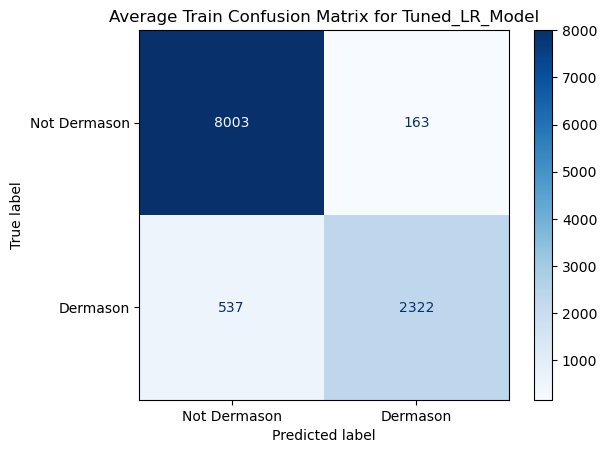

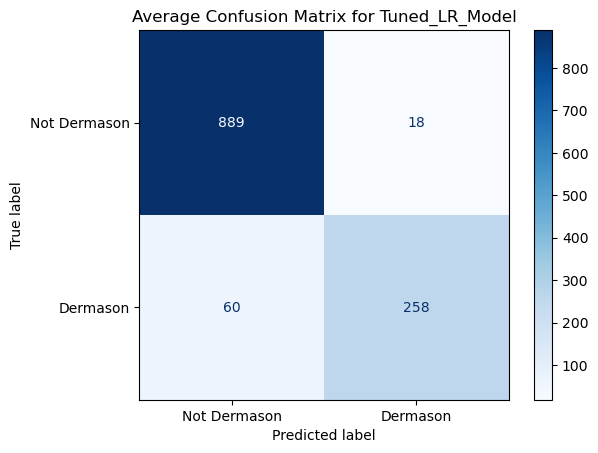

results for Tuned LR:
###TRAIN###
CV results for Tuned_LR_Model model:Average specificity: 0.98004
Average precision: 0.93440
Average recall: 0.81224
###VAL###
CV results for Tuned_LR_Model model:Average specificity: 0.97983
Average precision: 0.93396
Average recall: 0.81172

results for DT baseline (previous best model):
###TRAIN###
CV results for DT_Base_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 1.00000
###VAL###
CV results for DT_Base_Model model:Average specificity: 0.96352
Average precision: 0.89575
Average recall: 0.89389


(0.9635192992340533, 0.8957492446149351, 0.8938872686149635, {}, False, False)

In [22]:
model_kwargs= {'C': 10, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2' }
print(model_kwargs)

Tuned_LR_Model_Results= ModelWithCV(model_instantiator= LogisticRegression,
                  model_name= 'Tuned_LR_Model',
                  X= X_train_Norm,
                  y= y_train,
                  scaler= False,
                  smote_and_rand_und= False,
                  model_kwargs= model_kwargs)

Tuned_LR_Model_Results.plot_avg_conf_matrix()

print('results for Tuned LR:')
Tuned_LR_Model_Results.print_cv_summary()
print()
print('results for DT baseline (previous best model):')
DT_Baseline_Results.print_cv_summary()

We can see that this new tuned Logistic regression model is performing better than the previous most effective model (Baseline Decision Tree). This new LR model's validation specificity improved by almost 2%, and its precision improved by almost 4% over the previous best model. The only downside is that recal took about an 8% hit, but given the manufacturer's context for efficiency (maximize specificity and precision), this is an acceptable loss. 

This is now considered the most effective model given the context.

Now let's run an optimization grid search on the Decision tree to see if it can out perform the tunes Logistic Regression model.

## Run a grid search for preprocessing and hyperparameter tuning the Decision Tree model

I would like to note that here too this search scale has been narrowed down to parameters previously discovered to be effective, while still demonstrating the effectiveness and utility of the code. This has been done because previous wider searches have proven to be too computationally expensive for my current computer to handle, and cause the notebook to significantly slow down and-or crash. The original grid search parameters are noted above the current ones for reference. One potential way to mitigate this problem could be to split up the grid search and tune for one parameter at a time. 

In [23]:
#store iteration results
dt_metric_tracker= []
dt_data_and_scaler= []

#iterable options

#as shown below (data distribution normalization does not
#do much for decision trees)
data_sets= [X_train]

#list(range(1,33))
max_depths= [2,3,4,5]

#np.linspace(0.1, 1.0, 10, endpoint= True)
min_samples_splits = [0.05, 0.1, 0.15]

#['gini', 'entropy', 'log_loss']
criterions = ['gini']

#np.linspace(0.1, 0.5, 10, endpoint= True)
min_samples_leafs = [.1225, .1325, .1425]

#list(range(1, X_train.shape[1]))
max_feature_num = [2, 3, 4, 5]

#[True, False]
smote= [True]

#as shown below (data scaling does not
#do much for decision trees)
scaler= [False]


#nested for loops to iterate through all the above options
for data, data_name in zip(data_sets, ["X_train", "X_train_Norm"]):
    for depth in max_depths:
        for sm in smote:
            for sc in scaler:        
                for fit in int_fit:
                    for samp_split in min_samples_splits:
                        for solver in solvers:
                            for crit in criterions:
                                for samp_leafs in min_samples_leafs:
                                    for num_feat in max_feature_num:
                                        model_kwargs= {'max_depth': depth, 'min_samples_split': samp_split, 
                                                        'criterion': crit, 'min_samples_leaf': samp_leafs, 
                                                        'max_features': num_feat}
                                        #instantiate the class
                                        temp= ModelWithGridCV(model_instantiator= DecisionTreeClassifier,
                                                                            model_name= 'Tuned_DT_Model',
                                                                            X= data,
                                                                            y= y_train,
                                                                            scaler= sc,
                                                                            smote_and_rand_und= sm,
                                                                            model_kwargs= model_kwargs
                                                                           )
                                        
                                        dt_metric_tracker.append(temp.print_cv_summary())
                                        dt_data_and_scaler.append(data_name)

In [24]:
#merge the outputted data from the two lists into one data frame
dt_metrics_df= pd.DataFrame(dt_metric_tracker)
dt_data_scaler_df= pd.DataFrame(dt_data_and_scaler)
dt_tuned_results_df = pd.merge(dt_metrics_df, dt_data_scaler_df, left_index=True, right_index=True)

#print the length of the new data frame so we know how many model variations were made
print(len(dt_tuned_results_df))

#update the column names of the dataset so they make sense
dt_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_hyp_para', 'scaler', 'v_SM_RU', 'normalized']
dt_tuned_results_df.columns= dt_new_col_names

#preview the new dataset
dt_tuned_results_df.head()

576


,v_avg_spec,v_avg_prec,v_avg_rec,v_hyp_para,scaler,v_SM_RU,normalized
0,0.889562,0.736433,0.880659,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1225, 'max_features': 2}",False,True,X_train
1,0.978508,0.932186,0.841001,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1225, 'max_features': 3}",False,True,X_train
2,0.981374,0.940948,0.842891,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1225, 'max_features': 4}",False,True,X_train
3,0.791801,0.622309,0.974177,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1225, 'max_features': 5}",False,True,X_train
4,0.893090,0.738324,0.861139,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1325, 'max_features': 2}",False,True,X_train


In [25]:
#sort by highest precision rate
dt_tuned_grid_search_prec_sorted = dt_tuned_results_df.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

dt_tuned_grid_search_prec_sorted.head()

,v_avg_spec,v_avg_prec,v_avg_rec,v_hyp_para,scaler,v_SM_RU,normalized
10,0.986774,0.955633,0.806682,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}",False,True,X_train
22,0.986774,0.955633,0.806682,"{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}",False,True,X_train
34,0.986774,0.955633,0.806682,"{'max_depth': 2, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}",False,True,X_train
46,0.986774,0.955633,0.806682,"{'max_depth': 2, 'min_samples_split': 0.1, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}",False,True,X_train
58,0.986774,0.955633,0.806682,"{'max_depth': 2, 'min_samples_split': 0.15, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}",False,True,X_train


Sorting by precision immediately takes us to a well-balanced specificty/precision/recal instance. 

Optimizing for Specificity and Precision, without sacrificing too much recall, we have located an instance where the following average validation set scores are achieved:

1) Specificity: 98.6774%
2) Precision: 95.5633%
3) Recal: 80.6682%

This was achieved through the following:

Data Preprocessing:

1) Scaler: None
2) Data distribution normalization through Box-Cox and Log transformation: False
3) Class imbalance redistribution through SMOTE and Random Undersampling: True

Model Hyperparameter Tuning:

1) max_depth= 2
2) min_samples_split= 0.05
3) criterion= gini
4) min_samples_leaf= 0.1425
5) max_features= 4

### Display the results of the optimized Decision Tree model and compare to previous best model

{'max_depth': 2, 'min_samples_split': 0.05, 'criterion': 'gini', 'min_samples_leaf': 0.1425, 'max_features': 4}
SMOTEing and Randomly Undersampling


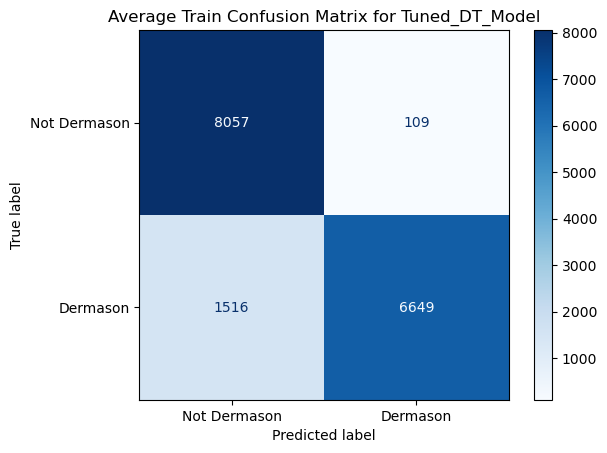

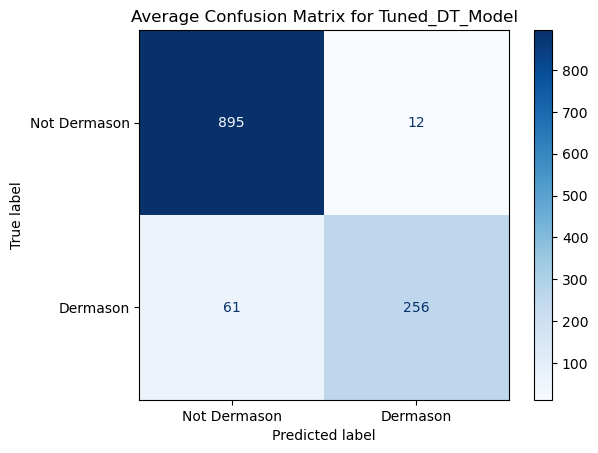

results for Tuned DT:
###TRAIN###
CV results for Tuned_DT_Model model:Average specificity: 0.98668
Average precision: 0.98390
Average recall: 0.81428
###VAL###
CV results for Tuned_DT_Model model:Average specificity: 0.98677
Average precision: 0.95563
Average recall: 0.80668

results for Tuned LR(previous best model):
###TRAIN###
CV results for Tuned_LR_Model model:Average specificity: 0.98004
Average precision: 0.93440
Average recall: 0.81224
###VAL###
CV results for Tuned_LR_Model model:Average specificity: 0.97983
Average precision: 0.93396
Average recall: 0.81172


(0.9798307583212313,
 0.9339614675372335,
 0.8117195405035416,
 {'C': 10, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'},
 False,
 False)

In [26]:
model_kwargs= {'max_depth': 2, 'min_samples_split': 0.05,
               'criterion': 'gini', 'min_samples_leaf': 0.1425, 
               'max_features': 4}

print(model_kwargs)
#instantiate the class
Tuned_DT_Model_Results= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                  model_name= 'Tuned_DT_Model',
                  X= X_train,
                  y= y_train,
                  scaler= False,
                  smote_and_rand_und= True,
                  model_kwargs= model_kwargs)

Tuned_DT_Model_Results.plot_avg_conf_matrix()

print('results for Tuned DT:')
Tuned_DT_Model_Results.print_cv_summary()
print()
print('results for Tuned LR(previous best model):')
Tuned_LR_Model_Results.print_cv_summary()

We can see that this new tuned Decision Tree model is performing better than the previous most effective model (Tuned Logistic Regression). Not only did this tuned model get rid of most of the baseline Decision Tree's overfitting, but its validation specificity improved by almost 1% over the previous best model, and its precision improved over 2% over the previous best model. The only downside is that recal took about an 0.05% hit compared to the previous best model, but given the manufacturer's context for efficiency (maximize specificity and precision), this is an acceptable loss. 

This is now considered the most effective model given the context.

Now lets run this new best model on the X_test data hold out we saved from the original train test split, and evaluate the results.

## Run this final tuned Decision Tree Model on the X_test data holdout and evaluate the results

I created a new model evaluating class by modifying the above ModelWithCv class so that it runs any inputted model on the final X_test data, instead of using Stratified K-fold Cross Validation on the training data, while keeping most other class features and functionality constant. This class will also be able to produce an accuracy score, which is not 100% relevant to the manufacturer's requested success metrics, but could still be interesting to know. I also removed the scaler input because the model we will be plugging into this will not be using scaling data preprocessing. 

In [33]:
class Model_with_final():
    #initialize the instance of the class 
    def __init__(self, model_instantiator, model_name, X_tr, y_tr, X_te, y_te, 
                 smote_and_rand_und= False, model_kwargs = {}):
        self.model_instatiator = model_instantiator
        self.model = None
        self.name = model_name
        self.model_kwargs = model_kwargs
        self.X_train = X_tr
        self.y_train = y_tr
        self.X_test = X_te
        self.y_test = y_te
        self.smote_and_rand_und= smote_and_rand_und
        self.model_kwargs = model_kwargs
        self.final_results = None
        self.final_accuracy = None
        self.final_specificity = None
        self.final_precision = None
        self.final_recall = None
        self.final_conf_matrix = None
        self.train_and_evaluate()

    #train the model and evaluate it on the test data
    def train_and_evaluate(self):
        
        #instantiate the model, make sure random_state is set to 24 for reproductability
        self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
        
        #SMOTE and Randomly Undersample the date
        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
            smote = SMOTE(sampling_strategy='auto', random_state=24)  
            undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)
            pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
            X_train, y_train = pipeline.fit_resample(self.X_train, self.y_train)
               
        self.model.fit(X_train, y_train)

        #make test set predictions
        y_pred = self.model.predict(self.X_test)
       
        #make test accuracy score
        self.final_accuracy = accuracy_score(self.y_test, y_pred)
        
        #make test confusion matrix
        self.final_conf_matrix = confusion_matrix(self.y_test, y_pred)

        #make test performance scores
        TN, FP, FN, TP = self.final_conf_matrix.ravel()
        self.final_specificity = TN / (TN + FP)
        self.final_precision = precision_score(self.y_test, y_pred)
        self.final_recall = recall_score(self.y_test, y_pred)
        self.final_results = {'Accuracy': self.final_accuracy,
            'Specificity': self.final_specificity,
            'Precision': self.final_precision,
            'Recall': self.final_recall}

    #print the performance scores of the test set
    def print_final_summary(self):
        print(f"Final results for {self.name} model on X_test:")
        print(f"Accuracy: {self.final_accuracy:.5f}")
        print(f"Specificity: {self.final_specificity:.5f}")
        print(f"Precision: {self.final_precision:.5f}")
        print(f"Recall: {self.final_recall:.5f}")

    #print the confusion matrix of the test set 
    def plot_conf_matrix(self):
        if self.final_conf_matrix is not None:
            labels= ['Not Dermanson', 'Dermason']
            disp = ConfusionMatrixDisplay(confusion_matrix=self.final_conf_matrix,
                                         display_labels= labels)
            disp.plot(cmap=plt.cm.Blues, values_format='.0f')
            plt.title(f"Confusion Matrix for {self.name} on X_test")
            plt.show()
            

Input the final model details into the new X_test model evaluator:

model_instantiator= DecisionTreeClassifier

Data Preprocessing:

1) Scaler: None
2) Data distribution normalization through Box-Cox and Log transformation: False
3) Class imbalance redistribution through SMOTE and Random Undersampling: True

Model Hyperparameter Tuning:

1) max_depth= 2
2) min_samples_split= 0.05
3) criterion= gini
4) min_samples_leaf= 0.1425
5) max_features= 4

SMOTEing and Randomly Undersampling


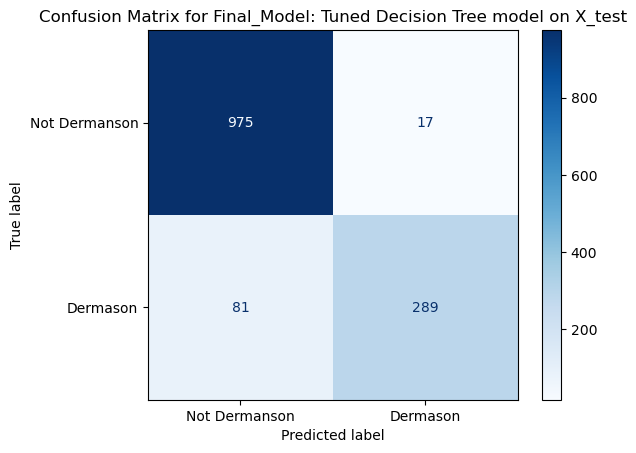

Final results for Final_Model: Tuned Decision Tree model model on X_test:
Accuracy: 0.92805
Specificity: 0.98286
Precision: 0.94444
Recall: 0.78108


In [34]:
model_kwargs= {'max_depth': 2, 'min_samples_split': 0.05,
               'criterion': 'gini', 'min_samples_leaf': 0.1425, 
               'max_features': 4}

Final_Model_Results= Model_with_final(model_instantiator= DecisionTreeClassifier,
                                    model_name= 'Final_Model: Tuned Decision Tree model',
                                    X_tr = X_train,
                                    y_tr = y_train,
                                     X_te = X_test,
                                     y_te = y_test,
                                     smote_and_rand_und= True,
                                     model_kwargs= model_kwargs)

Final_Model_Results.plot_conf_matrix()

Final_Model_Results.print_final_summary()

## Conclusions

My conclusion from the meta-analysis is that this food manufacturer could use binary classification via supervised machine learning in their production line to start to implement process automation that would cut down on manual labor time and potentially improve their manufacturing efficiency. 

In this specific test case area of concern, the Tuned Decision Tree Binary classification model can be used to separate Dermason beans from the mixture of other 6 other beans as the batch heads down the conveyor belt. If the classifier determines the bean is indeed a Dermason bean, an actuated pusher could be utilized to push the bean off of the belt and over to the Dermason processing area. 

Since Speceficity and Precision were the requested optimized metrics for success, and recal being the metric with the highest allowable error rate, we can say the following:

1) Given this model's Specificity rating of 98.286% on the testing data we can say that this model is extremely good at determining what is not a Dermason bean. This means that less than 2% of the time, a non-Dermason bean is incorrectly classified as a Dermason bean.

2) Given this model's precision rating of 94.444% on the testing data, we can say that when the model predicts a bean to be a Dermason bean, there is a high likelihood that it actually is a Dermason bean. This means that out of all the beans the model predicts as Dermason, less than 6% are actually non-Dermason beans.

3) Given this model's Recal rating of 78.108% on the testing data we can say that the model is decent at being able to identify all of the dermason beans going down the conveyor belt. This means that out of all the beans going down the conveyor that are actually Dermason beans, the model will correctly classify slightly over 78% of those beans as Dermason beans. Even though this score is not bad, it is still lower than the model's extremely high Specificity and Precision scores, but in this context that is okay because we would rather minimize the errors for beans that are classified as Dermason beans, and all beans not distinctly identified as a specific classification will be sent to the mixed batch process location where they can still be sold for a profit.

To deal with the small percentage of beans that are incorrectly classified as Dermason beans after going through the Decision Tree classification process, the manufacturer could put these beans through a second manual double-checking filter to remove the small number of incorrect classifications, thus significantly cutting down the time and effort put into manual sorting on the production line. 

## Next Steps

Here are three potential next steps that the manufacturer can take to further improve their system via automation:

1) Add additional types of sensors to the bean conveyor belt. Currently, this model is only run using dimensional multivariate data from computer vision processing. Beans have many more easily quantifiable attributes like weight and color that could be taken into account when trying to classify the type of bean. Equipping the conveyor with sensors that can extract this currently unquantified data could improve the effectiveness of this model.

2) Instead of running a bunch of individual one vs all classifications to sort the different types of beans, we could make a multiclassification model that classifies all the different kinds of beans at once.

3) Given more metrics and context other than product dimensions, a classification model could be created to separate the products by grade and quality. This could enable the manufacturer to separate one product into different tears such as: Medicinal Grade, Human Consumption, Animal Consumption, and Throw Away. 